Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                        

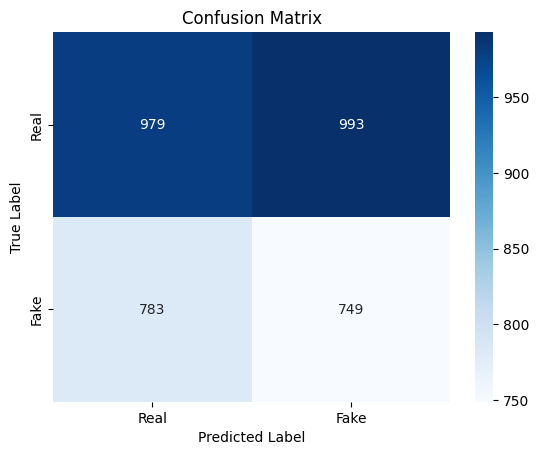

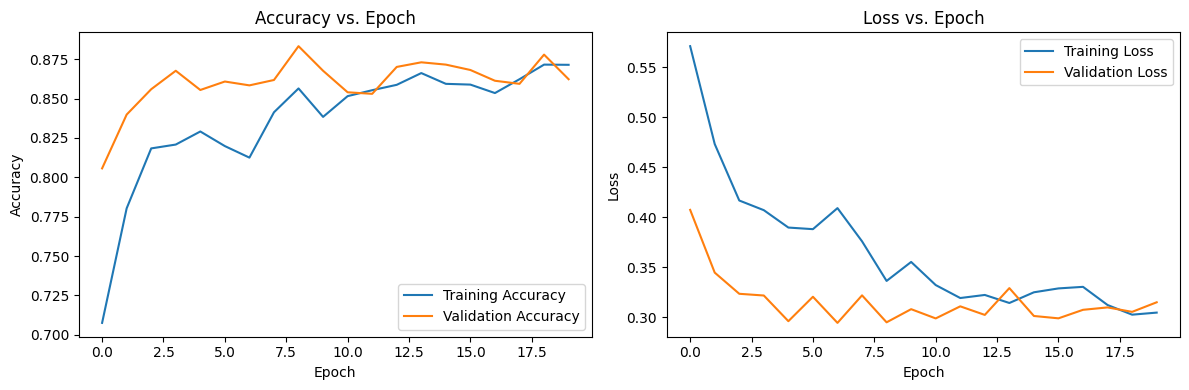

Found 18415 images belonging to 2 classes.
1151/1151 [==============================] - 263s 225ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.83      0.37      0.52      9281
        Fake       0.59      0.92      0.72      9134

    accuracy                           0.65     18415
   macro avg       0.71      0.65      0.62     18415
weighted avg       0.71      0.65      0.62     18415

Confusion Matrix:
[[3479 5802]
 [ 701 8433]]


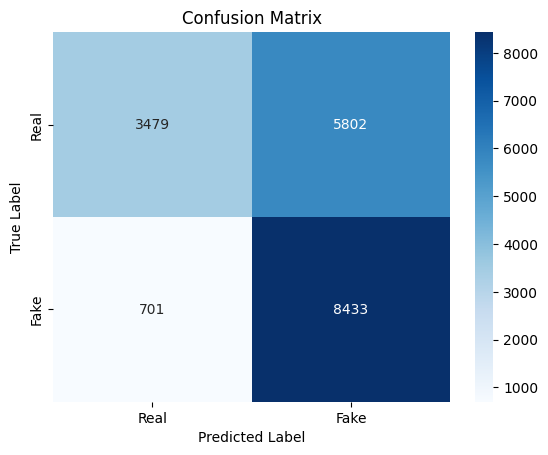

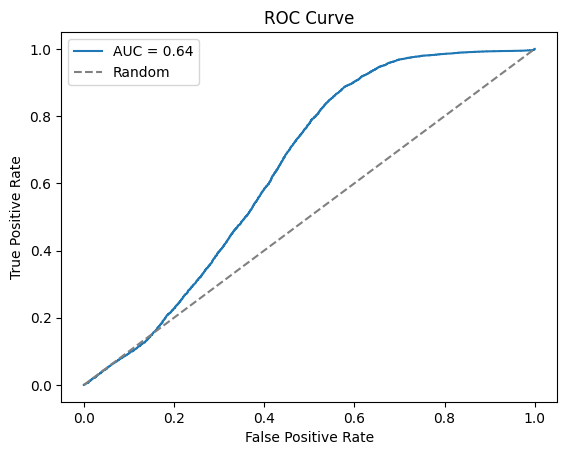

Evaluation Metrics:
accuracy: 0.6468639695900081
precision: 0.8322966507177033
recall: 0.37485184786122183
f1_score: 0.516900676027041
auc: 0.6433798038221147
Сообщение об окончании работы отправлено в Telegram.
Программа завершила работу.


In [2]:
import model_fit_evaluate 
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, InceptionV3, EfficientNetB2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_input_resnet50v2
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input_inceptionv3
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb2
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import os
import telebot

if __name__ == '__main__':
    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4  
    epochs = 20

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size)

    model = model_fit_evaluate.create_custom_model(
    base_model=VGG16, 
    weights="imagenet",  
    input_shape=(224, 224, 3),
    num_classes=1,  
    trainable_base=True  
    )

    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=6, reduce_lr_patience=2, reduce_lr_factor=0.5)

    model_fit_evaluate.evaluate_model(model, validation_generator)

    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test' 

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_resnet50v2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Found 7510 images belonging to 2 classes.
470/470 [==============================] - 66s 140ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.95      0.82      0.88      3789
        Fake       0.84      0.96      0.89      3721

    accuracy                           0.89      7510
   macro avg       0.89      0.89      0.88      7510
weighted avg       0.89      0.89      0.88      7510

Confusion Matrix:
[[3089  700]
 [ 163 3558]]


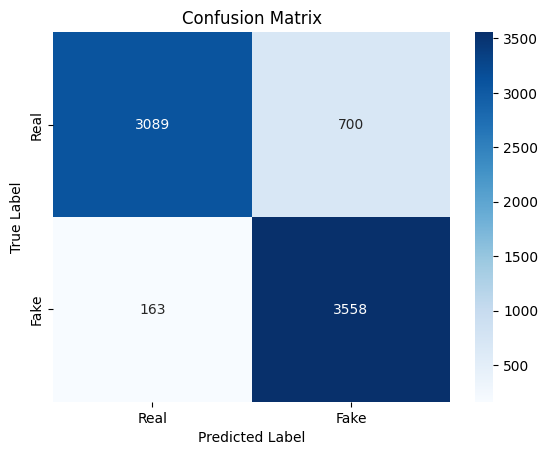

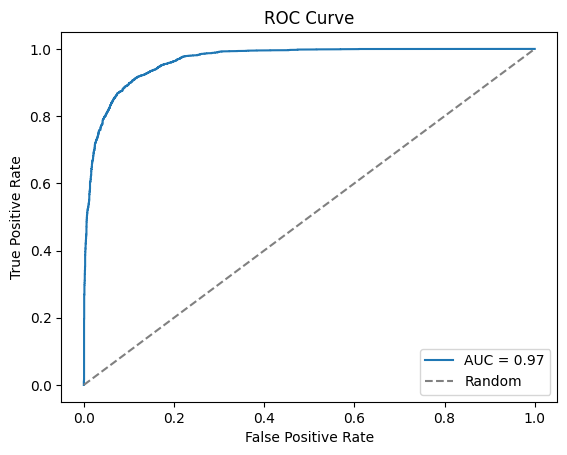

Evaluation Metrics:
accuracy: 0.88508655126498
precision: 0.9498769987699877
recall: 0.8152546846133545
f1_score: 0.8774321829285613
auc: 0.9662777915022831


In [3]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'test', preprocess_input_resnet50v2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Found 10110 images belonging to 2 classes.
632/632 [==============================] - 176s 278ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.92      0.62      0.74      5089
        Fake       0.71      0.94      0.81      5021

    accuracy                           0.78     10110
   macro avg       0.81      0.78      0.78     10110
weighted avg       0.81      0.78      0.78     10110

Confusion Matrix:
[[3175 1914]
 [ 293 4728]]


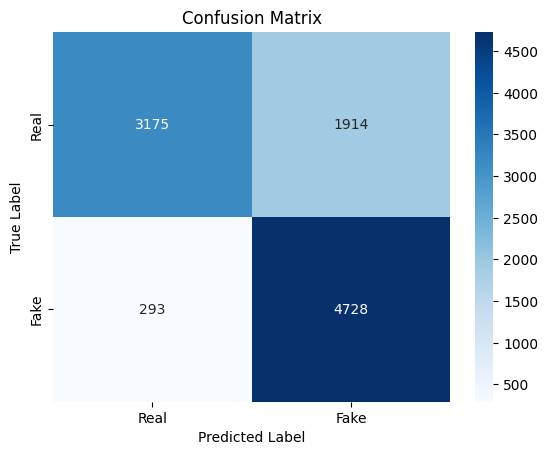

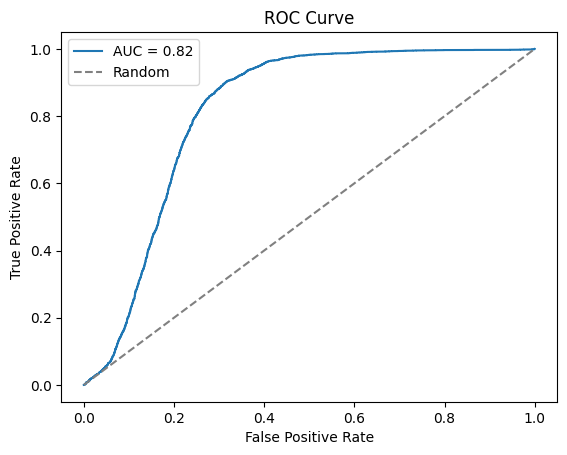

Evaluation Metrics:
accuracy: 0.7817012858555885
precision: 0.9155132641291811
recall: 0.62389467478876
f1_score: 0.7420825055510109
auc: 0.8151870416993763


In [6]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_resnet50v2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [5]:
model.save('VGG16_Deepfake.keras')